##==================================================================##
##        File: Electrochemical-plots.ipynb
##      Author: GOTTFRID OLSSON 
##     Created: 2024-04-24
##     Updated: 2024-04-26
##       About: Reads .txt files of electrochemical cycling of cells
##              and plots the data for the Master's Thesis [TIFX05].
##==================================================================##

In [21]:
# LIBRARIES #

import matplotlib
import numpy as np
import CSV_handler as CSV
import plot_functions as f
import matplotlib.pyplot as plt


In [22]:
# PLOT SETTINGS #

fig_width_cm  = 16
fig_height_cm = 9

font_size_axis   = 13
font_size_tick   = 11
font_size_legend = 9

grid_major = True
grid_minor = False
legend_on = True

f.set_LaTeX_and_CMU(True) #must run before plotting
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')

DONE: set_LaTeX_and_CMU: True


In [23]:
# FUNCTIONS #

def shift_df_column_to_start_at_zero(df_column):
    df_column_shift_value = df_column[0]
    return df_column - df_column_shift_value


def try_get_column_from_df(df, column_name_string):
    try:
        column = df.loc[:,column_name_string]
    except:
        print("EXCEPTION: No column with name {column_name_string} (instead returns value None).")
        column = None
    return column


def get_t_V_I_error_from_Biologic_file_root_path(root_path, shift_t_to_zero=False):
    df = CSV.read(root_path, delimiter='\t') #tab separated from Biologic

    t = try_get_column_from_df(df, "time/s")
    if shift_t_to_zero:
        try:
            t = shift_df_column_to_start_at_zero(t)
        except:
            print("EXCEPTION: Could not perform shift_df_column_to_start_at_zero().")

    V = try_get_column_from_df(df, "Ewe/V")
    I = try_get_column_from_df(df, "I/mA")
    e = try_get_column_from_df(df, "error")

    return [t, V, I, e]
    

def calculate_deposited_amount_mAhcm2_from_t_I(t, I):
    # assumes data in units 'time/s' and 'current/mA' as well as an electrode area of 0.196 cm2 (Li, 5 mm diameter)
    A = 0.196       # cm2
    t_hour = t/3600 # h (hour)
    J = np.abs(I)/A # mA / cm2; abs to avoid negative capcity
    C = J*t_hour    # mAh / cm2
    return C    


In [24]:
# Paths for data SEIDEP-measurements #

# SEIDEP: Deposition of Li after a 0.010 V hold and reaching a certain value of i_SEI / i_deposition (= \sigma)
SEIDEP_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\SEIDEP\\'

# sigma_x, _0x, _00x means: sigma = x, 0.x, or 0.0x
SEIDEP_sigma_1_MB_path   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt' # SEI-formation
SEIDEP_sigma_1_CP_path   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt' # Li-deposition
SEIDEP_sigma_01_MB_path  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt'
SEIDEP_sigma_01_CP_path  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt'
SEIDEP_sigma_005_MB_path = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt'
SEIDEP_sigma_005_CP_path = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C05.txt'

SEIDEP_sigma_1_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_1_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_1_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_1_CP_path, shift_t_to_zero=True)

SEIDEP_sigma_01_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_01_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_01_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_01_CP_path, shift_t_to_zero=True)

SEIDEP_sigma_005_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_005_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_CP_path, shift_t_to_zero=True)

DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLi

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.0001, 8000) and y=(-0.21, 0.0001) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: T-cells, SEI-formation, E_we=0.010 V, different $\sigma$
DONE: align_labels


DONE: set_layout_tight


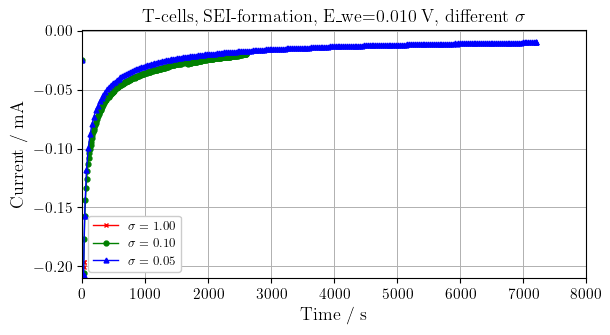

In [25]:
# PLOT SEIDEP: I vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(SEIDEP_sigma_1_MB[0],   SEIDEP_sigma_1_MB[2],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs.plot(SEIDEP_sigma_01_MB[0],  SEIDEP_sigma_01_MB[2],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs.plot(SEIDEP_sigma_005_MB[0], SEIDEP_sigma_005_MB[2], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Current / mA')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.0001, xmax=8000, ymin=-0.21, ymax=0.0001)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('T-cells, SEI-formation, E_we=0.010 V, different $\\sigma$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 5.1) and y=(-0.21, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: T-cells, Li-deposition, J=1mA/cm2, different $\sigma$
DONE: align_labels
DONE: set_layout_tight


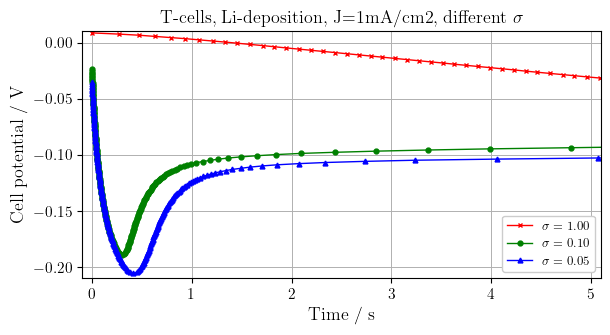

In [26]:
# PLOT SEIDEP: V vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(SEIDEP_sigma_1_CP[0],   SEIDEP_sigma_1_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs.plot(SEIDEP_sigma_01_CP[0],  SEIDEP_sigma_01_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs.plot(SEIDEP_sigma_005_CP[0], SEIDEP_sigma_005_CP[1], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Cell potential / V')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.1, xmax=5.1, ymin=-0.21, ymax=0.01)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('T-cells, Li-deposition, J=1mA/cm2, different $\\sigma$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

In [27]:
# Paths for data JP-measurements #

JP_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\JP-measurements\\'

T_cell = 'T-cell\\'
M_cell = 'M-cell\\'
C_cell = 'C-cell\\'


# CP #
A1_CP_path = JP_root_path + T_cell + '2024-04-25_JP-A1-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C05.txt'
A2_CP_path = JP_root_path + T_cell + '2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt'
A3_CP_path = JP_root_path + T_cell + '2024-04-23_JP-A3-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt'

A4_CP_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_04_CP_C11.txt'
A5_CP_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_04_CP_C10.txt'
A6_CP_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_04_CP_C11.txt'

A7_CP_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A7-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C10.txt'
A8_CP_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A8-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C11.txt'
A9_CP_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A9-04_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C10.txt'

A55_CP_path = JP_root_path + M_cell + '2024-04-29_JP-measurements_sample-A5.5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax109.9mm_04_CP_C03.txt'
A85_CP_path = JP_root_path + C_cell + '2024-04-29_JP-measurements_sample-A8.5-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C03.txt'


A1_CP  = get_t_V_I_error_from_Biologic_file_root_path(A1_CP_path,  shift_t_to_zero=True)
A2_CP  = get_t_V_I_error_from_Biologic_file_root_path(A2_CP_path,  shift_t_to_zero=True)
A3_CP  = get_t_V_I_error_from_Biologic_file_root_path(A3_CP_path,  shift_t_to_zero=True)
A4_CP  = get_t_V_I_error_from_Biologic_file_root_path(A4_CP_path,  shift_t_to_zero=True)
A5_CP  = get_t_V_I_error_from_Biologic_file_root_path(A5_CP_path,  shift_t_to_zero=True)
A55_CP = get_t_V_I_error_from_Biologic_file_root_path(A55_CP_path, shift_t_to_zero=True)
A6_CP  = get_t_V_I_error_from_Biologic_file_root_path(A6_CP_path,  shift_t_to_zero=True)
A7_CP  = get_t_V_I_error_from_Biologic_file_root_path(A7_CP_path,  shift_t_to_zero=True)
A8_CP  = get_t_V_I_error_from_Biologic_file_root_path(A8_CP_path,  shift_t_to_zero=True)
A85_CP = get_t_V_I_error_from_Biologic_file_root_path(A85_CP_path, shift_t_to_zero=True)
A9_CP  = get_t_V_I_error_from_Biologic_file_root_path(A9_CP_path,  shift_t_to_zero=True)





#### probably want MB curves too, at least to show 'the deposition started here, here, and here for sample Ax, Ay, Az' ###
# MB #
A1_MB_path = JP_root_path + T_cell + '2024-04-25_JP-A1-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_02_MB_C05.txt'
A2_MB_path = JP_root_path + T_cell + '2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_02_MB_C10.txt'
A3_MB_path = JP_root_path + T_cell + '2024-04-23_JP-A3-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_02_MB_C10.txt'

A4_MB_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_02_MB_C11.txt'
A5_MB_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C10.txt'
A6_MB_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C11.txt'

A7_MB_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A7-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C10.txt'
A8_MB_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A8-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C11.txt'
A9_MB_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A9-04_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C10.txt'


A1_MB = get_t_V_I_error_from_Biologic_file_root_path(A1_MB_path, shift_t_to_zero=True)
A2_MB = get_t_V_I_error_from_Biologic_file_root_path(A2_MB_path, shift_t_to_zero=True)
A3_MB = get_t_V_I_error_from_Biologic_file_root_path(A3_MB_path, shift_t_to_zero=True)
A4_MB = get_t_V_I_error_from_Biologic_file_root_path(A4_MB_path, shift_t_to_zero=True)
A5_MB = get_t_V_I_error_from_Biologic_file_root_path(A5_MB_path, shift_t_to_zero=True)
A6_MB = get_t_V_I_error_from_Biologic_file_root_path(A6_MB_path, shift_t_to_zero=True)
A7_MB = get_t_V_I_error_from_Biologic_file_root_path(A7_MB_path, shift_t_to_zero=True)
A8_MB = get_t_V_I_error_from_Biologic_file_root_path(A8_MB_path, shift_t_to_zero=True)
A9_MB = get_t_V_I_error_from_Biologic_file_root_path(A9_MB_path, shift_t_to_zero=True)

DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\JP-measurements\T-cell\2024-04-25_JP-A1-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\JP-measurements\T-cell\2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\JP-measurements\T-cell\2024-04-23_JP-A3-02_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\JP-measurements\M-cell\2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_04_CP_C11.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\JP-measurements\M-cell\2024-04-24_JP-measurements_sample-A5

In [28]:
# PLOT for each cell type, plot different curves potential vs. time #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(fig_width_cm/2.54, 3*fig_height_cm/2.54), sharex=False, sharey=False)

unit_string = '$mA\\,cm$^{-2}$'
J01_string = '$J=0.10\\,' + unit_string
J1_string  = '$J=1.00\\,' + unit_string
J5_string  = '$J=1.00\\,' + unit_string
J10_string = '$J=10.0\\,' + unit_string

# Plot your data (axs.plot, .errorbar, .hist, ...) # ''Ax_CP = [t, V, I, error]''
# T-cell
axs[0].plot(A1_CP[0],  A1_CP[1],  linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label=J01_string)
axs[0].plot(A2_CP[0],  A2_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=J1_string)
axs[0].plot(A3_CP[0],  A3_CP[1],  linewidth=1, linestyle='-', color='b', marker='^', markersize='3.50', label=J10_string)

# M-cell
axs[1].plot(A4_CP[0],  A4_CP[1],  linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label=J01_string)
axs[1].plot(A5_CP[0],  A5_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=J1_string)
axs[1].plot(A55_CP[0], A55_CP[1], linewidth=1, linestyle='-', color='k', marker='s', markersize='3.25', label=J5_string)
axs[1].plot(A6_CP[0],  A6_CP[1],  linewidth=1, linestyle='-', color='b', marker='^', markersize='3.50', label=J10_string)

# C-cell
axs[2].plot(A7_CP[0],  A7_CP[1],  linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label=J01_string)
axs[2].plot(A8_CP[0],  A8_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=J1_string)
axs[2].plot(A85_CP[0], A85_CP[1], linewidth=1, linestyle='-', color='k', marker='s', markersize='3.25', label=J5_string)
axs[2].plot(A9_CP[0],  A9_CP[1],  linewidth=1, linestyle='-', color='b', marker='^', markersize='3.50', label=J10_string)


# Settings for each axis (axs)
for i, ax in enumerate(axs):
    title_string = ['T-cell', 'M-cell', 'C-cell']
    f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
    f.set_axis_scale(   ax, xScale_string='linear', yScale_string='linear')
    f.set_axis_labels(  ax, x_label='Time / s', y_label='Cell potential / V')
    f.set_axis_invert(  ax, x_invert=False, y_invert=False)
    f.set_axis_limits(  ax, xmin=-0.1, xmax=8.1, ymin=-0.4, ymax=0.01)
    f.set_grid(         ax, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
    f.set_legend(       ax, legend_on=legend_on, alpha=1.0, location='best')
    ax.set_title(title_string[i])

f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 8.1) and y=(-0.4, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 8.1) and y=(-0.4, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on 

KeyboardInterrupt: 

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 1.6) and y=(-0.451, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 1.6) and y=(-0.451, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False

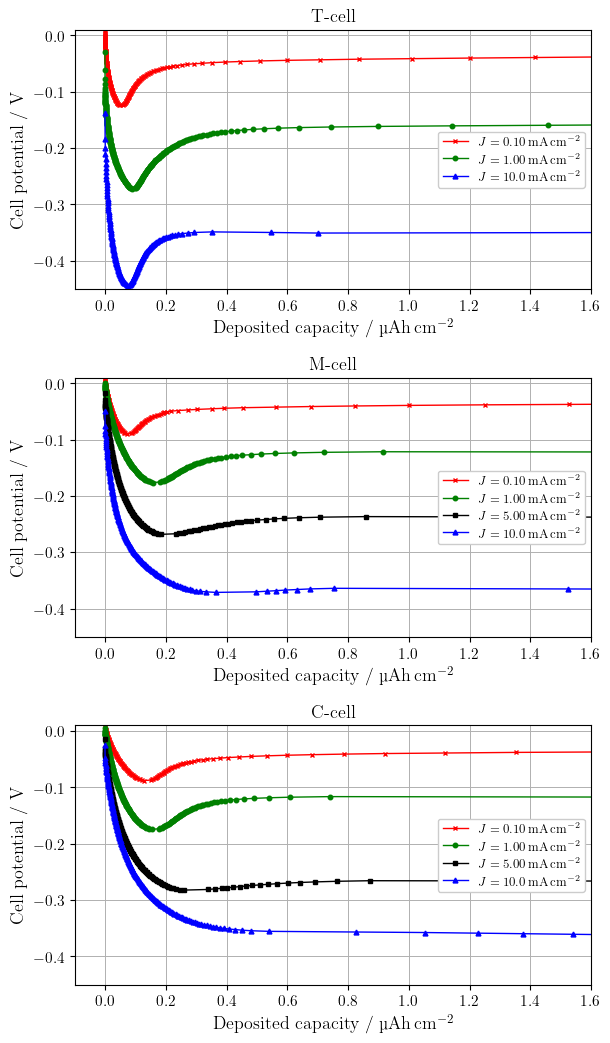

In [ ]:
# PLOT for each cell type, plot different curves potential vs. deposited amount #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(fig_width_cm/2.54, 3*fig_height_cm/2.54), sharex=False, sharey=False)

unit_string = '$mA\\,cm$^{-2}$'
J01_string = '$J=0.10\\,' + unit_string
J1_string  = '$J=1.00\\,' + unit_string
J5_string  = '$J=5.00\\,' + unit_string
J10_string = '$J=10.0\\,' + unit_string

A1_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A1_CP[0],  A1_CP[2])*1000 #muAh/cm2
A2_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A2_CP[0],  A2_CP[2])*1000 #muAh/cm2
A3_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A3_CP[0],  A3_CP[2])*1000 #muAh/cm2
A4_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A4_CP[0],  A4_CP[2])*1000 #muAh/cm2
A5_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A5_CP[0],  A5_CP[2])*1000 #muAh/cm2
A55_CP_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(A55_CP[0], A55_CP[2])*1000 #muAh/cm2
A6_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A6_CP[0],  A6_CP[2])*1000 #muAh/cm2
A7_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A7_CP[0],  A7_CP[2])*1000 #muAh/cm2
A8_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A8_CP[0],  A8_CP[2])*1000 #muAh/cm2
A85_CP_deposited_amount = calculate_deposited_amount_mAhcm2_from_t_I(A85_CP[0], A85_CP[2])*1000 #muAh/cm2
A9_CP_deposited_amount  = calculate_deposited_amount_mAhcm2_from_t_I(A9_CP[0],  A9_CP[2])*1000 #muAh/cm2

# Plot your data (axs.plot, .errorbar, .hist, ...) # ''Ax_CP = [t, V, I, error]''
# T-cell
axs[0].plot(A1_CP_deposited_amount, A1_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label=J01_string)
axs[0].plot(A2_CP_deposited_amount, A2_CP[1],   linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=J1_string)
axs[0].plot(A3_CP_deposited_amount, A3_CP[1],   linewidth=1, linestyle='-', color='b', marker='^', markersize='3.50', label=J10_string)

# M-cell
axs[1].plot(A4_CP_deposited_amount, A4_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label=J01_string)
axs[1].plot(A5_CP_deposited_amount, A5_CP[1],   linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=J1_string)
axs[1].plot(A55_CP_deposited_amount, A55_CP[1], linewidth=1, linestyle='-', color='k', marker='s', markersize='3.25', label=J5_string)
axs[1].plot(A6_CP_deposited_amount, A6_CP[1],   linewidth=1, linestyle='-', color='b', marker='^', markersize='3.50', label=J10_string)

# C-cell
axs[2].plot(A7_CP_deposited_amount, A7_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.50', label=J01_string)
axs[2].plot(A8_CP_deposited_amount, A8_CP[1],   linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=J1_string)
axs[2].plot(A85_CP_deposited_amount, A85_CP[1], linewidth=1, linestyle='-', color='k', marker='s', markersize='3.25', label=J5_string)
axs[2].plot(A9_CP_deposited_amount, A9_CP[1],   linewidth=1, linestyle='-', color='b', marker='^', markersize='3.50', label=J10_string)


# Settings for each axis (axs)
for i, ax in enumerate(axs):
    cell_string = ['T-cell', 'M-cell', 'C-cell']
    f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
    f.set_axis_scale(   ax, xScale_string='linear', yScale_string='linear')
    f.set_axis_labels(  ax, x_label='Deposited capacity / \\textmu Ah\\,cm$^{-2}$', y_label='Cell potential / V')
    f.set_axis_invert(  ax, x_invert=False, y_invert=False)
    f.set_axis_limits(  ax, xmin=-0.0001*1000, xmax=0.0016*1000, ymin=-0.451, ymax=0.01) #xmax=0.501
    f.set_grid(         ax, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
    f.set_legend(       ax, legend_on=legend_on, alpha=1.0, location='best')
    ax.set_title(cell_string[i])

f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

DONE: set_axis_limits: x=(-0.1, 25.1) and y=(-0.14, 0.01) on axs: None
DONE: set_axis_limits: x=(-0.1, 4.1) and y=(-0.3, 0.01) on axs: None
DONE: set_axis_limits: x=(-0.1, 1.6) and y=(-0.5, 0.01) on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_

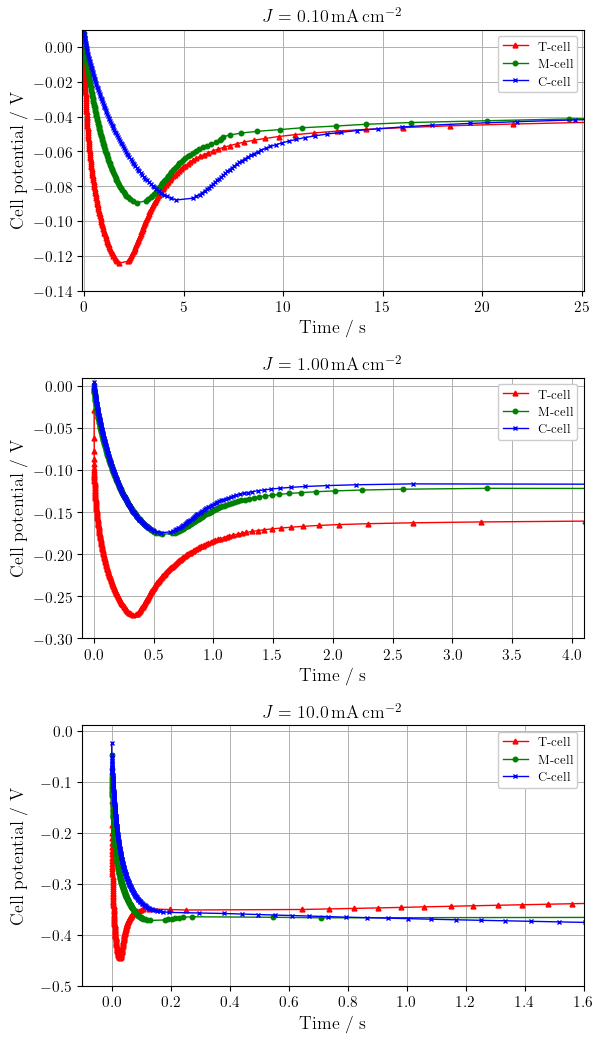

In [ ]:
# PLOT: for each current density, plot curves for different cell types #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(fig_width_cm/2.54, 3*fig_height_cm/2.54), sharex=False, sharey=False)

T_cell_string = 'T-cell'
C_cell_string = 'C-cell'
M_cell_string = 'M-cell'

# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
axs[0].plot(A1_CP[0], A1_CP[1], linewidth=1, linestyle='-', color='r', marker='^', markersize='3.50', label=T_cell_string)
axs[0].plot(A4_CP[0], A4_CP[1], linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=M_cell_string)
axs[0].plot(A7_CP[0], A7_CP[1], linewidth=1, linestyle='-', color='b', marker='x', markersize='3.50', label=C_cell_string)

axs[1].plot(A2_CP[0], A2_CP[1], linewidth=1, linestyle='-', color='r', marker='^', markersize='3.50', label=T_cell_string)
axs[1].plot(A5_CP[0], A5_CP[1], linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=M_cell_string)
axs[1].plot(A8_CP[0], A8_CP[1], linewidth=1, linestyle='-', color='b', marker='x', markersize='3.50', label=C_cell_string)

axs[2].plot(A3_CP[0], A3_CP[1], linewidth=1, linestyle='-', color='r', marker='^', markersize='3.50', label=T_cell_string)
axs[2].plot(A6_CP[0], A6_CP[1], linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label=M_cell_string)
axs[2].plot(A9_CP[0], A9_CP[1], linewidth=1, linestyle='-', color='b', marker='x', markersize='3.50', label=C_cell_string)


# Settings for each axis (axs)
f.set_axis_limits(  axs[0], xmin=-0.1, xmax=25.1, ymin=-0.14, ymax=0.01)
f.set_axis_limits(  axs[1], xmin=-0.1, xmax=4.1, ymin=-0.3, ymax=0.01)
f.set_axis_limits(  axs[2], xmin=-0.1, xmax=1.6, ymin=-0.5, ymax=0.01)

for i, ax in enumerate(axs):
    title_string = ['$J=0.10\\,$mA\\,cm$^{-2}$', '$J=1.00\\,$mA\\,cm$^{-2}$', '$J=10.0\\,$mA\\,cm$^{-2}$']
    f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
    f.set_axis_scale(   ax, xScale_string='linear', yScale_string='linear')
    f.set_axis_labels(  ax, x_label='Time / s', y_label='Cell potential / V')
    f.set_axis_invert(  ax, x_invert=False, y_invert=False)
    f.set_grid(         ax, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
    f.set_legend(       ax, legend_on=legend_on, alpha=1.0, location='best')
    ax.set_title(title_string[i])

f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

In [35]:
# Paths for data E-measurements #

E_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\E-measurements\\'
C_cell = 'C-cell\\'

# CP #
E_Ionic_CP_path = E_root_path + C_cell + '2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt'
E_LiPF6_CP_path = E_root_path + C_cell + '2024-04-25_E-measurements_sample-LiPF6-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiPF6_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt'
E_LiFSI_CP_path = E_root_path + C_cell + '2024-04-25_E-measurements_sample-LiFSI-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt'

E_Ionic_CP = get_t_V_I_error_from_Biologic_file_root_path(E_Ionic_CP_path, shift_t_to_zero=True)
E_LiPF6_CP = get_t_V_I_error_from_Biologic_file_root_path(E_LiPF6_CP_path, shift_t_to_zero=True)
E_LiFSI_CP = get_t_V_I_error_from_Biologic_file_root_path(E_LiFSI_CP_path, shift_t_to_zero=True)



DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\E-measurements\C-cell\2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\E-measurements\C-cell\2024-04-25_E-measurements_sample-LiPF6-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiPF6_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\E-measurements\C-cell\2024-04-25_E-measurements_sample-LiFSI-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt


DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_limits: x=(-0.1, 4.1) and y=(-0.31, 0.01) on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: C-cell, $J=1.00\,$mA\,cm$^{-2}$
DONE: align_labels
DONE: set_layout_tight


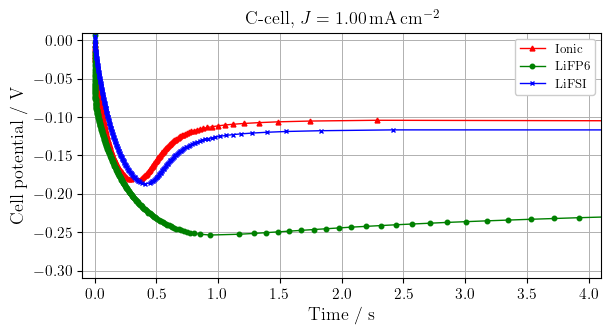

In [39]:
# PLOT: plot different electrolytes #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
axs.plot(E_Ionic_CP[0], E_Ionic_CP[1], linewidth=1, linestyle='-', color='r', marker='^', markersize='3.50', label='Ionic')
axs.plot(E_LiPF6_CP[0], E_LiPF6_CP[1], linewidth=1, linestyle='-', color='g', marker='o', markersize='3.25', label='LiFP6')
axs.plot(E_LiFSI_CP[0], E_LiFSI_CP[1], linewidth=1, linestyle='-', color='b', marker='x', markersize='3.50', label='LiFSI')


# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Cell potential / V')
f.set_axis_limits(  axs, xmin=-0.1, xmax=4.1, ymin=-0.31, ymax=0.01)
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('C-cell, $J=1.00\\,$mA\\,cm$^{-2}$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()